<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Map-preprocessing" data-toc-modified-id="Map-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Map preprocessing</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#File-ID" data-toc-modified-id="File-ID-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>File ID</a></span></li><li><span><a href="#English-name" data-toc-modified-id="English-name-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>English-name</a></span></li><li><span><a href="#Vocalization_type" data-toc-modified-id="Vocalization_type-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Vocalization_type</a></span></li><li><span><a href="#Quality" data-toc-modified-id="Quality-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Quality</a></span></li><li><span><a href="#Time" data-toc-modified-id="Time-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Time</a></span></li><li><span><a href="#Date" data-toc-modified-id="Date-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Grids" data-toc-modified-id="Grids-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Grids</a></span></li><li><span><a href="#Kasios-records" data-toc-modified-id="Kasios-records-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Kasios records</a></span></li></ul></li><li><span><a href="#First-Visualizations" data-toc-modified-id="First-Visualizations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>First Visualizations</a></span><ul class="toc-item"><li><span><a href="#All-records-locations" data-toc-modified-id="All-records-locations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>All records locations</a></span><ul class="toc-item"><li><span><a href="#All-Birds" data-toc-modified-id="All-Birds-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>All Birds</a></span></li><li><span><a href="#Discriminate-Blue-pipits" data-toc-modified-id="Discriminate-Blue-pipits-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Discriminate Blue-pipits</a></span></li></ul></li><li><span><a href="#Add-Kasios-records-locations" data-toc-modified-id="Add-Kasios-records-locations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Add Kasios records locations</a></span></li><li><span><a href="#Evolution-of-Blue-pipit-locations-since-2006" data-toc-modified-id="Evolution-of-Blue-pipit-locations-since-2006-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Evolution of Blue pipit locations since 2006</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image
from matplotlib import animation
import seaborn as sns
import mpld3
from mpld3 import plugins
from mpld3.utils import get_id
#mpld3.enable_notebook()

In [2]:
# our vast librairy
import vast as vst

In [3]:
path = "https://github.com/zhufangda/Telecom_Paristech-3rd_year/raw/master/"\
        +"DATA920_Visualization/2018%20Mini-Challenge%201/"

# Map preprocessing

In [4]:
# vectorize the map
map_contours = vst.vectorize(path + "lekagul_roadways_2018.png")

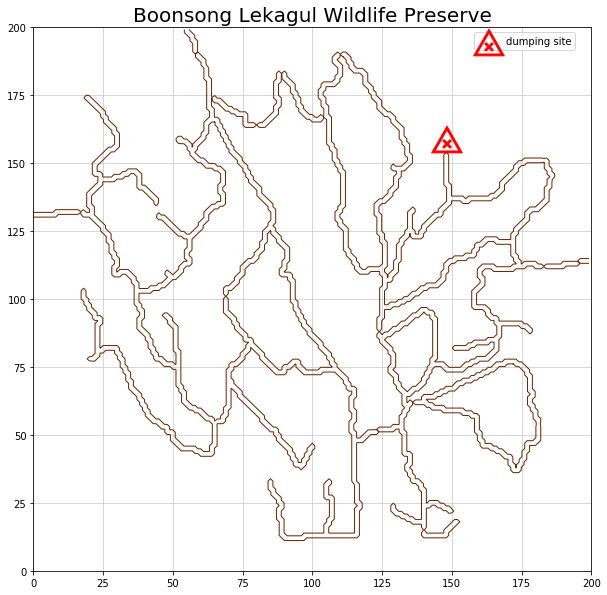

In [5]:
# Print the map
fig, ax = plt.subplots(figsize=(10,10))
vst.print_map(ax, map_contours, "Boonsong Lekagul Wildlife Preserve")
ax.legend(bbox_to_anchor=(0.98, 1), labelspacing=1)

plt.show()


<div class="alert alert-info">
  This map will serve as a background for all geographic informations
</div>

# Data preprocessing

In [92]:
# read the file 
data = pd.read_csv(path + "AllBirdsv4.csv", parse_dates=[5], dayfirst=True)

In [93]:
# info on data
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 8 columns):
File ID              2081 non-null int64
English_name         2081 non-null object
Vocalization_type    2081 non-null object
Quality              2081 non-null object
Time                 2081 non-null object
Date                 2081 non-null object
X                    2081 non-null int64
Y                    2081 non-null object
dtypes: int64(2), object(6)
memory usage: 130.1+ KB


In [94]:
data.head()

File ID             English_name Vocalization_type   Quality   Time  \
0   402254  Rose-crested Blue Pipit              call  no score  13:30   
1   406171  Rose-crested Blue Pipit              call         A   7:48   
2   405901  Rose-crested Blue Pipit              call         A  12:00   
3   405548  Rose-crested Blue Pipit              song         A  11:00   
4   401782  Rose-crested Blue Pipit              song         A   6:00   

        Date    X    Y  
0   2/8/2018   49   63  
1   6/7/2017  125  133  
2   2/8/2018   58   76  
3  3/10/2018   55  125  
4  6/29/2008  129  123

## File ID

In [95]:
# check absence of duplicated ID
sum(data.duplicated('File ID'))

0

<div class="alert alert-info">
  No duplicates. This feature is only a link to the mp3 files.
  We don't have yet checked if all the links point to a file.
</div>

## English-name

In [96]:
cat_bird = pd.Categorical(data['English_name'],ordered=False)

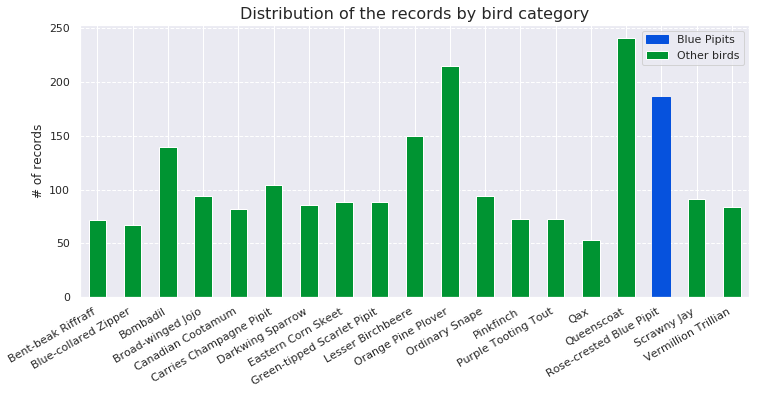

In [97]:
# plot the distribution of bird categories records
fig = plt.subplots(figsize=(12,5))
ax = cat_bird.value_counts().plot(kind='bar', color='#009432', 
                                  label='Other birds', zorder = 2)
ax.get_children()[16].set_color('#0652DD')
ax.get_children()[16].set_label('Blue Pipits')
plt.xticks(rotation=30, ha='right')
plt.ylabel("# of records", fontsize=12)
ax.legend()
ax.grid(which='major', axis='y', linestyle='--', zorder=1)
plt.title("Distribution of the records by bird category", fontsize=16)
plt.show()

In [98]:
# Add a column with 1 for the Blue pipits else 0
data['IsRCBP'] = data['English_name'].apply(lambda x: 1 \
                                            if x=="Rose-crested Blue Pipit"\
                                            else 0)

In [99]:
# display the percentahe of Blue Pipits records
print("percentage of Blue Pipit records: %.2f " % 
      (100 * data['IsRCBP'].sum()/data.shape[0]))

percentage of Blue Pipit records: 8.94 


<div class="alert alert-info">
  All categories are consistent, and the Blue pipits records constitute a sufficient percentage of the records to work.
</div>

## Vocalization_type

In [100]:
# all in lower string
data['Vocalization_type'] = data['Vocalization_type'].apply(str.lower)
# delete spaces
data['Vocalization_type'] = data['Vocalization_type'].apply(str.strip)

In [101]:
cat_vocaliz = pd.Categorical(data['Vocalization_type'],ordered=False)

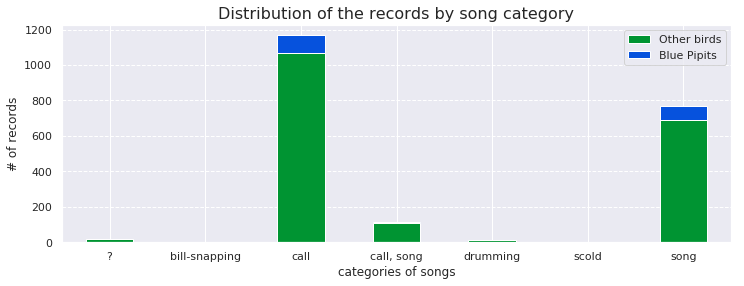

In [102]:
# PLot the distribution of the records by song category
fig, ax = plt.subplots(figsize=(12,4))
data.groupby(['Vocalization_type','IsRCBP'])['X'].size().unstack()\
                .plot(kind='bar',stacked=True, ax=ax, 
                      color=['#009432','#0652DD'], zorder=2)
ax.legend(["Other birds", "Blue Pipits"])
plt.xticks(rotation=0, ha='center')
plt.ylabel("# of records", fontsize=12)
plt.xlabel('categories of songs', fontsize=12)
ax.grid(which='major', axis='y', linestyle='--', zorder=1)
plt.title("Distribution of the records by song category", fontsize=16)
plt.show()

<div class="alert alert-info">
  Call & songs are the main categories. We can later remove them (to be checked), their audio wave will likely be outliers.
</div>

## Quality 

In [103]:
cat_quality = pd.Categorical(data['Quality'],ordered=True)

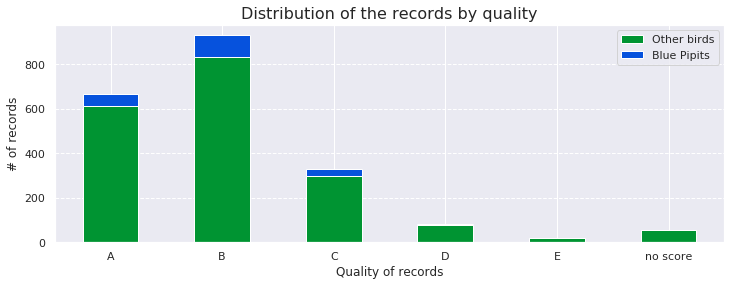

In [104]:
# PLot the distribution of the records by quality
fig, ax = plt.subplots(figsize=(12,4))
data.groupby(['Quality','IsRCBP'])['X'].size().unstack()\
                .plot(kind='bar',stacked=True, ax=ax, 
                      color=['#009432','#0652DD'], zorder=2)
ax.legend(["Other birds", "Blue Pipits"])
plt.xticks(rotation=0, ha='center')
plt.ylabel("# of records", fontsize=12)
plt.xlabel('Quality of records', fontsize=12)
ax.grid(which='major', axis='y', linestyle='--', zorder=1)
plt.title("Distribution of the records by quality", fontsize=16)
plt.show()

<div class="alert alert-info">
 If necessary, we will remove all D, E and ?-quality records, to save time and efficiency.
</div>

## Time

In [105]:
# map the daytime in hour, or 0 if NaN or bad value
data['Hour'] = data['Time'].apply(vst.clean_time)

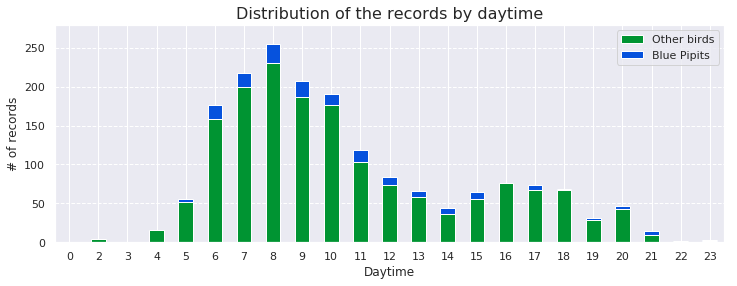

In [106]:
# PLot the distribution of the records by daytime
fig, ax = plt.subplots(figsize=(12,4))
data.groupby(['Hour','IsRCBP'])['X'].size().unstack()\
                .plot(kind='bar',stacked=True, ax=ax, 
                      color=['#009432','#0652DD'], zorder=2)
ax.legend(["Other birds", "Blue Pipits"])
plt.xticks(rotation=0, ha='center')
plt.ylabel("# of records", fontsize=12)
plt.xlabel('Daytime', fontsize=12)
# remove 00 values, which have been attribued to all NaN time
ax.get_children()[0].remove()
ax.get_children()[22].remove()
ax.grid(which='major', axis='y', linestyle='--', zorder=1)
plt.title("Distribution of the records by daytime", fontsize=16)
plt.show()

<div class="alert alert-info">
 No particular conclusion. To keep in mind. 
</div>

## Date

In [107]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

In [108]:
# to be able drawing timely graphics, definition of three time scales
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Year_month'] = data['Year'] + data['Month'] / 12.

In [109]:
# list of all year
dates = data['Year'].drop_duplicates().sort_values().dropna()

In [110]:
nb_records_per_year = data['Date'].groupby(data['Date'].dt.year).count()

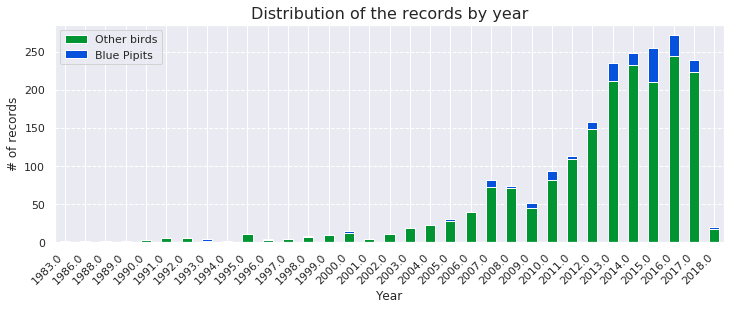

In [111]:
# PLot the distribution of the records by year
fig, ax = plt.subplots(figsize=(12,4))
data.groupby(['Year','IsRCBP'])['X'].size().unstack()\
                .plot(kind='bar',stacked=True, ax=ax, 
                      color=['#009432','#0652DD'], zorder=2)
ax.legend(["Other birds", "Blue Pipits"])
plt.ylabel("# of records", fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.grid(which='major', axis='y', linestyle='--', zorder=1)
plt.title("Distribution of the records by year", fontsize=16)
plt.show()

<div class="alert alert-info">
<ul>
  <li>We don't have a lot of records for 2018</li>
  <li>The interesting period to study Blue pipits is after 2006</li>
</ul>
</div>

## Grids

In [112]:
# clean the grids 
# returns -1 if not possible to select a number beetween 0 and 200
data['X'] = data['X'].apply(vst.clean_grid)
data['Y'] = data['Y'].apply(vst.clean_grid)

## Kasios records

In [113]:
kasios_records = pd.read_csv(path + "Test_Birds_Location.csv")

In [114]:
kasios_records = kasios_records.rename(index=str, columns={" X": "X", " Y":"Y"})

# First Visualizations

## All records locations

### All Birds

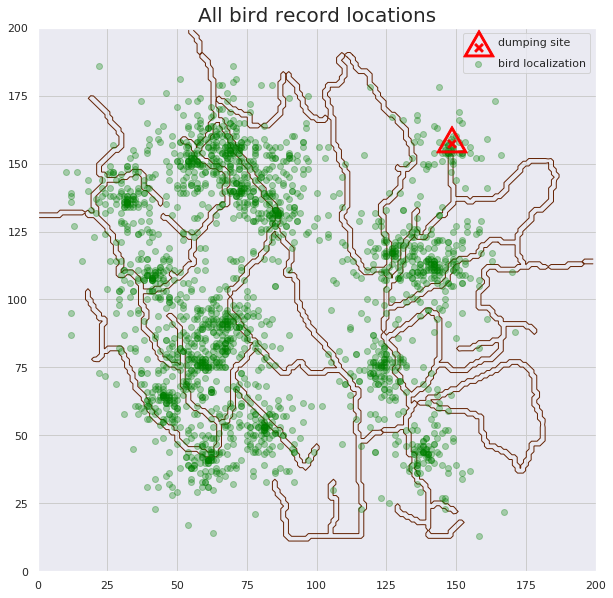

In [115]:
# Lets start ploting all the birds
fig, ax = plt.subplots(figsize=(10,10))
vst.print_map(ax, map_contours, "All bird record locations")
ax.scatter(data['X'], data['Y'], color='green', alpha=0.3, 
           label="bird localization", zorder=5)
ax.legend(bbox_to_anchor=(1, 1), labelspacing=1)
plt.show()

<div class="alert alert-info">
It seems that there are high density plots. It will have to be studies timely.
</div>

In [116]:
colors = ['#a6cee3','#009432','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f',
          '#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928','#004d40','#7B1FA2',
          '#7C4DFF','#795548','#0652DD','#B53471','#FF9800','#8BC34A','#CDDC39',
          '#b71c1c','#FFC107','#607D8B']   

In [117]:
## using mpld3... if necessary (error is not JSON serializable) 
# python -m pip install --user "git+https://github.com/javadba/mpld3@display_fix"

In [118]:
fig, ax = plt.subplots(figsize=(10,10))
vst.print_map(ax, map_contours, "All bird record locations")
elements = []

for i, categ in enumerate(cat_bird.categories.tolist()):
    X = data.loc[data['English_name'] == categ]['X'].tolist()
    Y = data.loc[data['English_name'] == categ]['Y'].tolist()
    element = ax.scatter(X,Y, color=colors[i], alpha=1, marker='o', zorder=5)
    elements.append([element])
labels = cat_bird.categories.tolist()
#ax.legend(bbox_to_anchor=(1, 1), labelspacing=1)
plugins.connect(fig, plugins.InteractiveLegendPlugin(elements, labels,  
                                                     alpha_unsel=0.2, 
                                                     alpha_over=1.5, 
                                                     start_visible=False))
mpld3.display(fig)

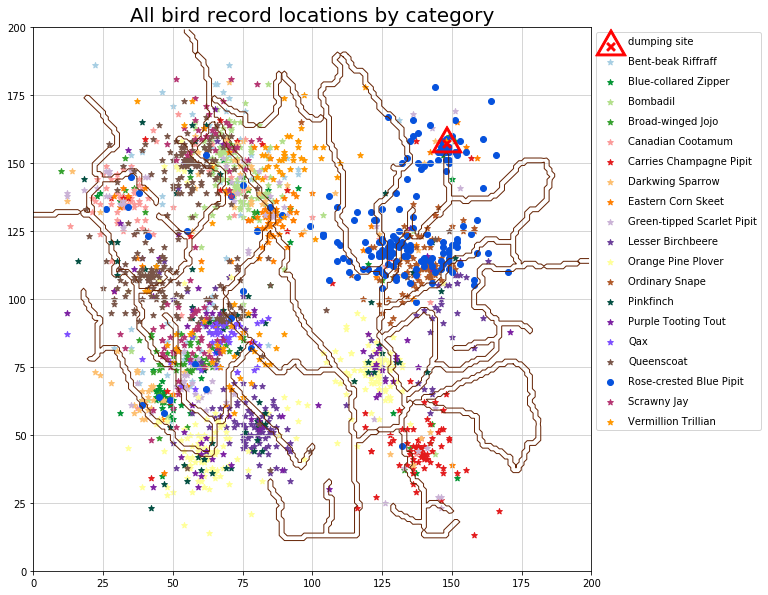

In [33]:
# plot all the birds by category
fig, ax = plt.subplots(figsize=(10,10))
# print the map
vst.print_map(ax, map_contours, "All bird record locations by category")
# add all birds by category
for i, categ in enumerate(cat_bird.categories):
    X = data.loc[data['English_name'] == categ]['X']
    Y = data.loc[data['English_name'] == categ]['Y']
    if (categ == 'Rose-crested Blue Pipit'):
        ax.scatter(X, Y, marker='o', label = categ, c=colors[i])
    else:
        ax.scatter(X, Y, marker='*', label = categ, c=colors[i])
ax.legend(bbox_to_anchor=(1, 1), labelspacing=1)
plt.show()   

<div class="alert alert-info">
All bird categories seems to have some habbits. With sufficient plot, we will be able to draw trends and acceptable conclusions.
</div>

### Discriminate Blue-pipits

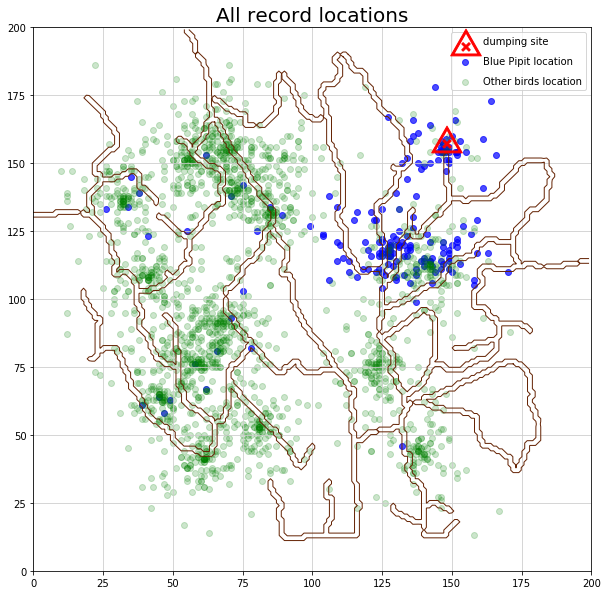

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
# print the map
vst.print_map(ax, map_contours, "All record locations")
# plot Blue pipits
ax.scatter(data.loc[data['IsRCBP']== 1]['X'], 
           data.loc[data['IsRCBP']== 1]['Y'],
           color='blue', alpha=0.7, label="Blue Pipit location")
# plot others
ax.scatter(data.loc[data['IsRCBP']== 0]['X'], 
           data.loc[data['IsRCBP']== 0]['Y'],
           color='green', alpha=0.2, label="Other birds location")

ax.legend(bbox_to_anchor=(1, 1), labelspacing=1)
plt.show()

<div class="alert alert-info">
At first glance, pipit blues have nested or still nest in the area of dumping site.
</div>

## Add Kasios records locations

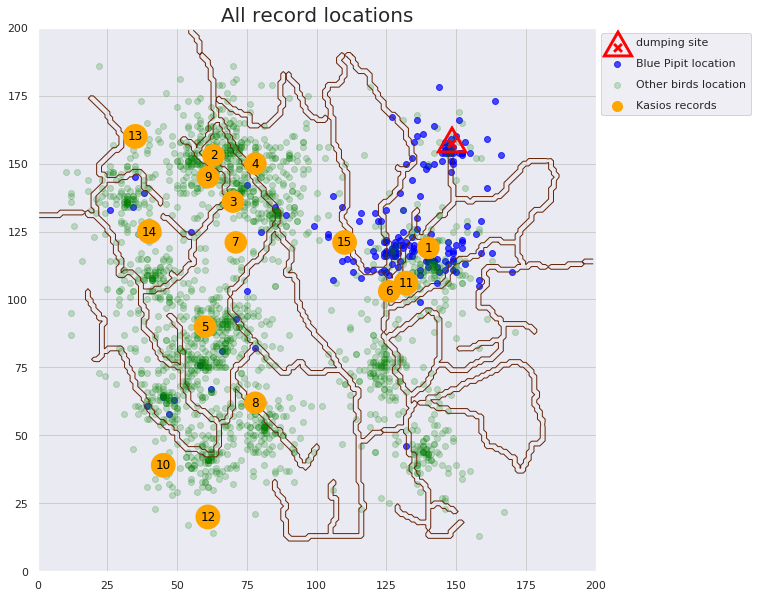

In [119]:
fig, ax = plt.subplots(figsize=(10,10))
# print the map
vst.print_map(ax, map_contours, "All record locations")
# plot Blue pipits
ax.scatter(data.loc[data['IsRCBP']== 1]['X'], 
           data.loc[data['IsRCBP']== 1]['Y'],
           color='blue', alpha=0.7, label="Blue Pipit location")
# plot others
ax.scatter(data.loc[data['IsRCBP']== 0]['X'], 
           data.loc[data['IsRCBP']== 0]['Y'],
           color='green', alpha=0.2, label="Other birds location")

# Add Kasios records with ID
for i, txt in enumerate(kasios_records['ID'].values):
    ax.text(kasios_records['X'].values[i], kasios_records['Y'].values[i], 
            txt, color='black', ha="center", va="center", 
            bbox={'pad':0.4, 'boxstyle':'circle', 
                  'edgecolor':'none', 'facecolor':'orange'})

ax.scatter([], [], color='orange', marker='o',s=100, label='Kasios records')
ax.legend(bbox_to_anchor=(1, 1), labelspacing=1)
plt.show()

<div class="alert alert-info">
The Kasios records are located in average further west than the other Blue pipits records. But they are recent.
</div>

## Evolution of Blue pipit locations since 2006

In [120]:
# interval from 2006 to today
interesting_dates = dates.loc[data['Year'] >= 2006 ].tolist()

In [121]:
# to harmonize year scale 
data1 = data.loc[data['IsRCBP']== 0]
L = data1['Year'].groupby(data['Year']).count()/len(data1)
ratio_1 = 10 + L * 4 / L.max()
ratio_2 = 14 + L * 4 / L.max()
# then use sns with bw = (ratio_1[date], ratio_2[date])

In [122]:
# animated gif (yearly) with all birds density and blue pipits location

def animate_all_post2006(date):
    """This function draw the yearly-frame that will be added to the gif"""
    ax.cla()
    data_year = data.loc[data['Year']== date]
    X = data_year['X'].values
    Y = data_year['Y'].values
    # if there is enough plots, draw a density area
    if len(X)>2:
        sns.kdeplot(X, Y, cmap="Greens", shade=True, shade_lowest=False, ax=ax, bw = (ratio_1[date], ratio_2[date]))
    # add blue pipits
    ax.scatter(data_year.loc[data['IsRCBP']== 1]['X'], 
               data_year.loc[data['IsRCBP']== 1]['Y'],
               color='blue', alpha=0.7, label="Blue Pipit localization")    
    # add Kasios records
    for i, txt in enumerate(kasios_records['ID'].values):
        ax.text(kasios_records['X'].values[i], kasios_records['Y'].values[i], 
                txt, color='black', ha="center", va="center", 
                bbox={'pad':0.4, 'boxstyle':'circle', 
                      'edgecolor':'none', 'facecolor':'orange'})
    ax.scatter([], [], color='orange', marker='o',s=100, label='Kasios records')
    
    vst.print_map(ax, map_contours, 
                  "Density of All birds, Year {}".format(int(date)))
fig, ax = plt.subplots(figsize=(10,10)) 

anim = animation.FuncAnimation(fig, animate_all_post2006, 
                               frames=vst.pause(interesting_dates, 3))
anim.save('Allbirds_since2006.gif', writer='imagemagick', fps=1);
plt.close()

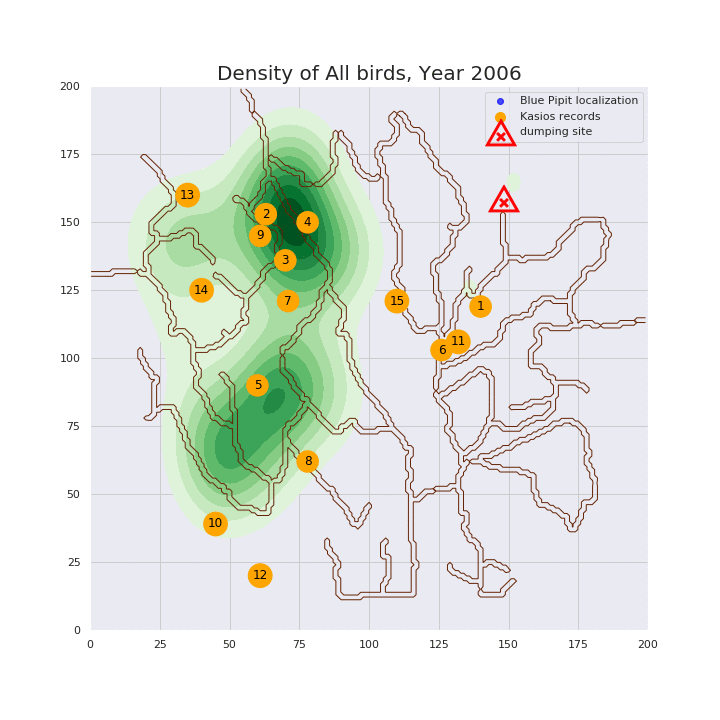

In [123]:
# display the animated gif
with open('Allbirds_since2006.gif','rb') as file:
    display(Image(file.read()))

<div class="alert alert-info">
It seems that in 2015, birds migrated from the dumping site to the area in (135, 135), then further west.
</div>

In [62]:
# to harmonize year scale 
data1 = data.loc[data['IsRCBP']== 0]
L = data1['Year'].groupby(data['Year']).count()/len(data1)
ratio_1 = 10 + L * 4 / L.max()
ratio_2 = 14 + L * 4 / L.max()
# then use sns with bw = (ratio_1[date], ratio_2[date])

In [71]:
# animated gif (yearly) with blue pipits density 

def animate_bp_post2006(date):
    ax.cla()
    RCPB_year = data.loc[data['Year']== date].loc[data['IsRCBP']== 1]
    X = RCPB_year['X'].values
    Y = RCPB_year['Y'].values
    if len(X)>2:
        sns.kdeplot(X, Y, cmap="Blues", shade=True, shade_lowest=False, ax=ax,   bw = (ratio_1[date], ratio_2[date]))
    for i, txt in enumerate(kasios_records['ID'].values):
        ax.text(kasios_records['X'].values[i], kasios_records['Y'].values[i], 
                txt, color='black', ha="center", va="center", 
                bbox={'pad':0.4, 'boxstyle':'circle', 
                      'edgecolor':'none', 'facecolor':'orange'})
    ax.scatter([], [], color='orange', marker='o',s=100, label='Kasios records')
    vst.print_map(ax, map_contours, 
                  "Density of Blue-pipit, Year {}".format(int(date)))

fig, ax = plt.subplots(figsize=(10,10))
ax.legend(bbox_to_anchor=(0.90, 1), labelspacing=1)
anim = animation.FuncAnimation(fig, animate_bp_post2006, 
                               frames=vst.pause(interesting_dates, 3))
anim.save('BluePipit_since2006.gif', writer='imagemagick', fps=1);
plt.close()

No handles with labels found to put in legend.


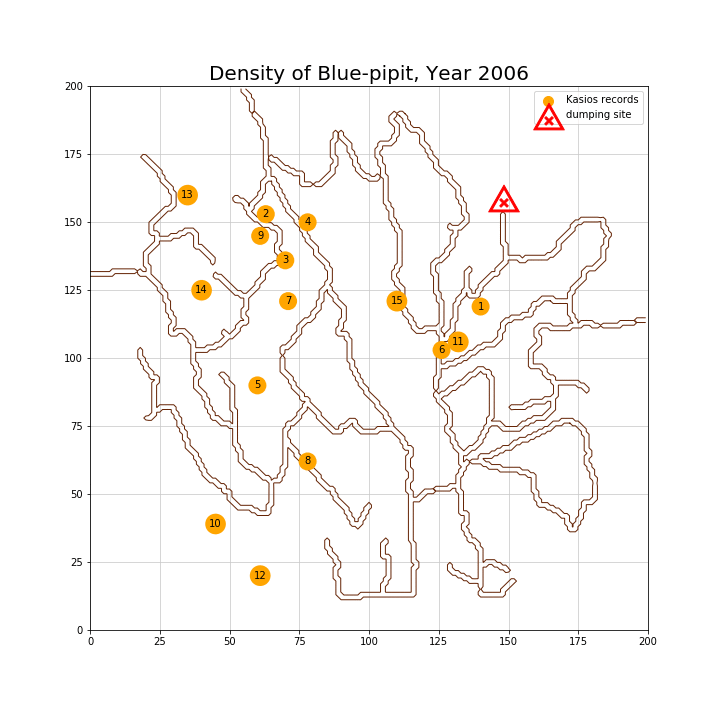

In [72]:
with open('BluePipit_since2006.gif','rb') as file:
    display(Image(file.read()))

<div class="alert alert-info">
It will be interesting to study records \#1, \#11, \#6 and \#15, and check if there are actually blue pipits records. Otherwise all blue pipits could have migrated to the area beetween (50, 150) and (50, 50)
</div>

TypeError: Input z must be a 2D array.

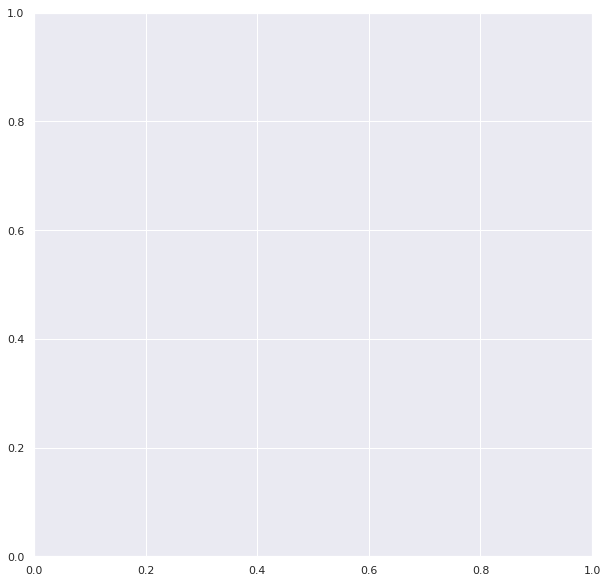

In [125]:
RCPB_year = data.loc[data['Year']== 2015]
X = RCPB_year['X'].values
Y = RCPB_year['Y'].values
fig, ax = plt.subplots(figsize=(10,10))
#kde = sns.kdeplot(X, Y, cmap="Blues", shade=True, shade_lowest=False, ax=ax,   bw = (ratio_1[2015], ratio_2[2015]))
#fig.colorbar(kde)



mean, cov = [0, 2], [(1, .5), (.5, 1)]
data2 = np.random.multivariate_normal(mean, cov, size=50).T

kde = stats.gaussian_kde(data2)
density = kde(np.c_[X.flat, Y.flat].T).reshape(X.shape)
cset = ax.contourf(X, Y, density, cmap="viridis")
fig.colorbar(cset)
plt.show()

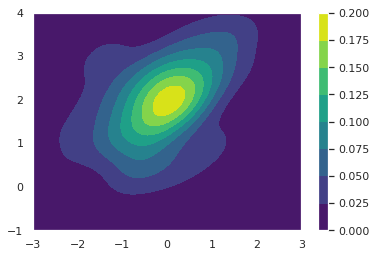

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)
from scipy import stats

mean, cov = [0, 2], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, size=50).T

kde = stats.gaussian_kde(data)
xx, yy = np.mgrid[-3:3:.01, -1:4:.01]
density = kde(np.c_[xx.flat, yy.flat].T).reshape(xx.shape)

f, ax = plt.subplots()
cset = ax.contourf(xx, yy, density, cmap="viridis")
f.colorbar(cset)